In [6]:
!pip3 install -U ucimlrepo

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# from sklearn import svm


In [8]:
!unzip /content/WineTest.zip -d /content/

Archive:  /content/WineTest.zip
  inflating: /content/WineQT.csv     


In [9]:
!unzip /content/iris.zip -d /content/

unzip:  cannot find or open /content/iris.zip, /content/iris.zip.zip or /content/iris.zip.ZIP.


In [10]:
df = pd.read_csv("/content/WineQT.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [11]:
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets
data = pd.concat([X,y], axis =1)
data

sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [12]:
le = LabelEncoder()
data['class'] =le.fit_transform(data['class'])
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [13]:
X = iris.data.features
X

sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

<Axes: >

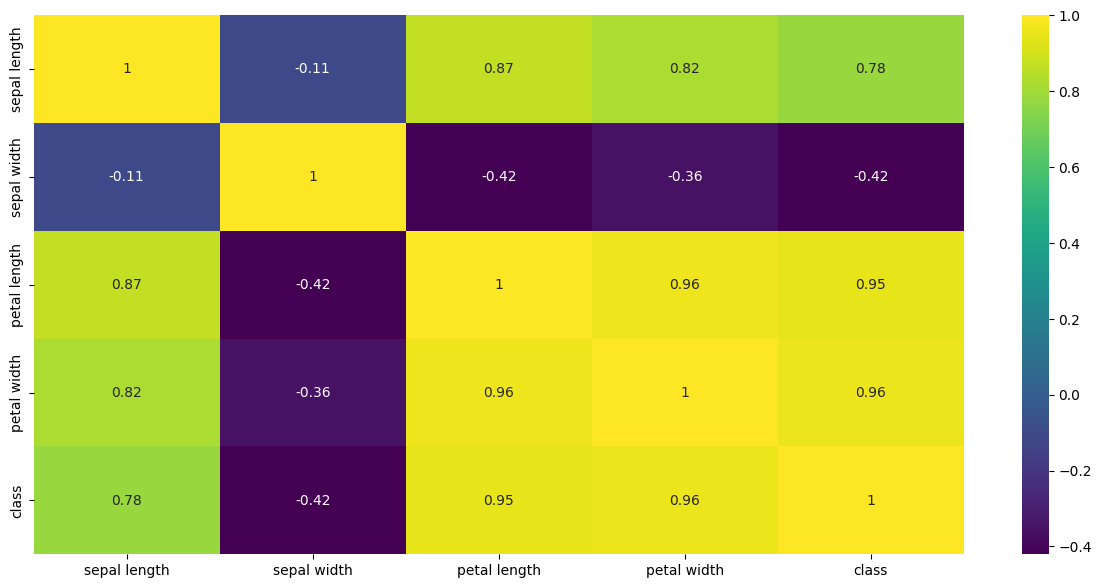

In [52]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(),cmap='viridis', annot=True)

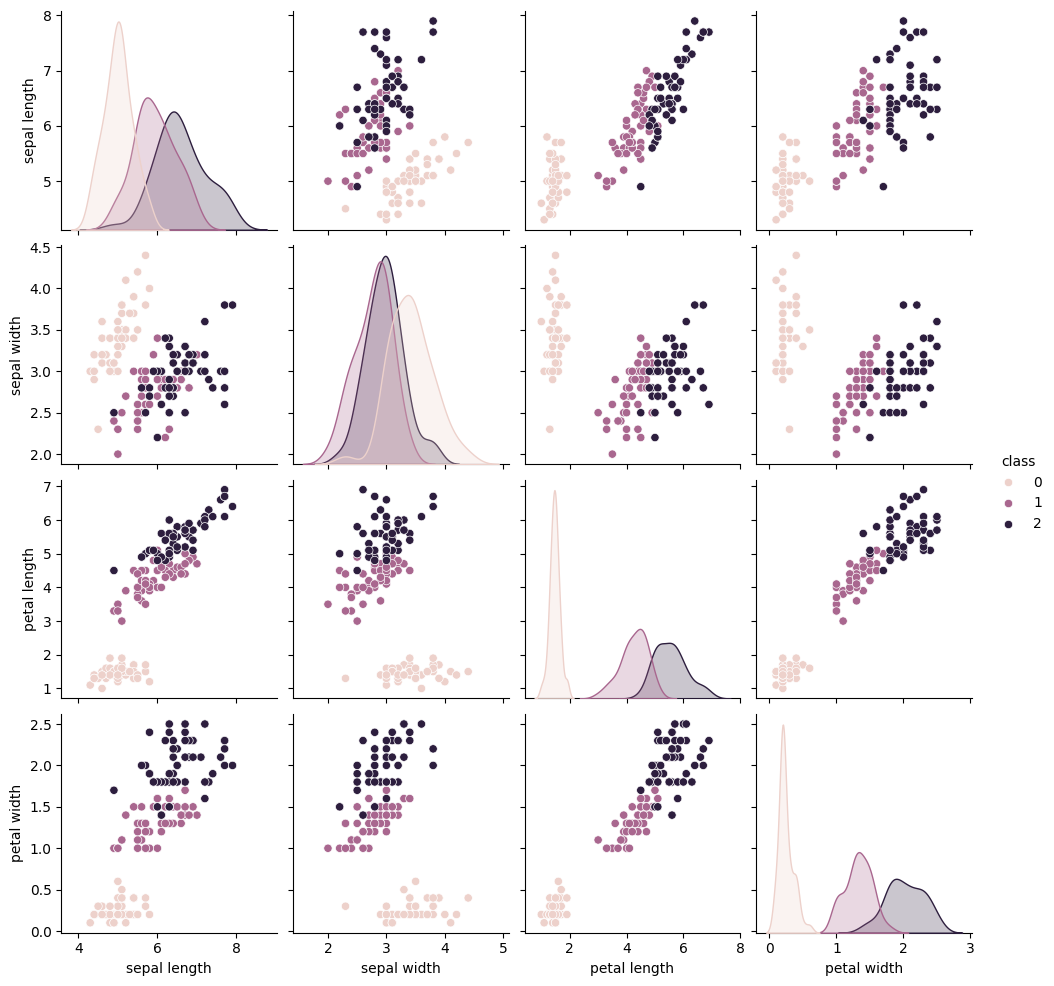

In [14]:
sns.pairplot(data, hue='class', diag_kind='kde')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print("Accuracy of linear SVM:", accuracy)


Accuracy of linear SVM: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
X.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

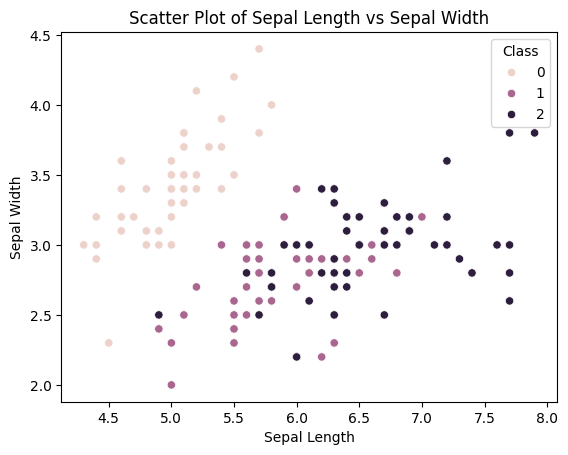

In [17]:

sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=data)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.legend(title='Class')
plt.show()

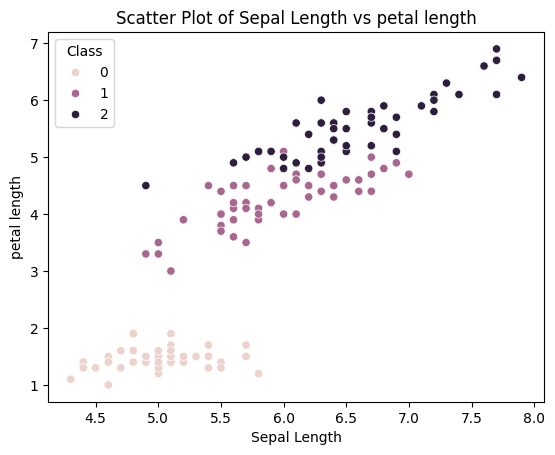

In [18]:
sns.scatterplot(x='sepal length', y='petal length', hue='class', data=data)
plt.xlabel('Sepal Length')
plt.ylabel('petal length')
plt.title('Scatter Plot of Sepal Length vs petal length')
plt.legend(title='Class')
plt.show()

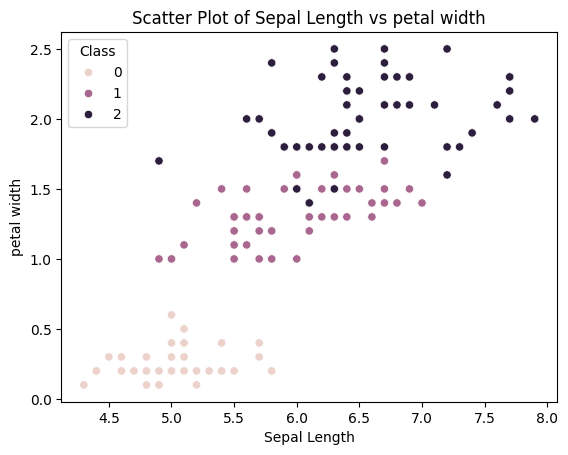

In [19]:
sns.scatterplot(x='sepal length', y='petal width', hue='class', data=data)
plt.xlabel('Sepal Length')
plt.ylabel('petal width')
plt.title('Scatter Plot of Sepal Length vs petal width')
plt.legend(title='Class')
plt.show()

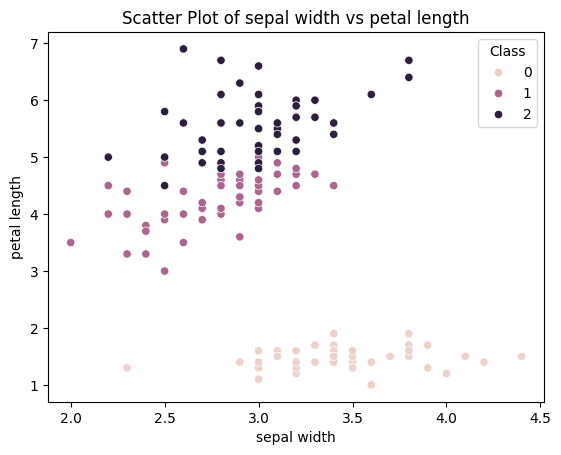

In [20]:
sns.scatterplot(x='sepal width', y='petal length', hue='class', data=data)
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.title('Scatter Plot of sepal width vs petal length')
plt.legend(title='Class')
plt.show()

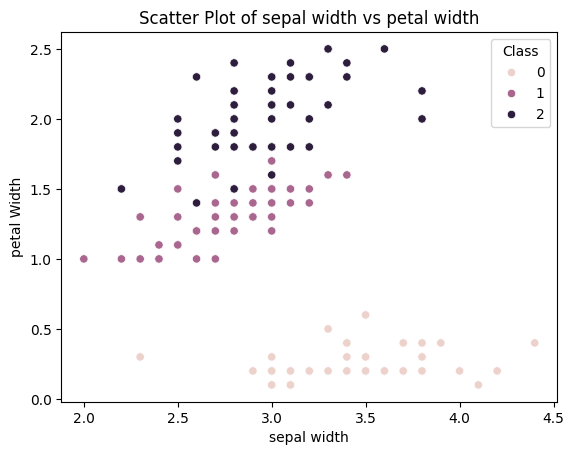

In [21]:
sns.scatterplot(x='sepal width', y='petal width', hue='class', data=data)
plt.xlabel('sepal width')
plt.ylabel('petal Width')
plt.title('Scatter Plot of sepal width vs petal width')
plt.legend(title='Class')
plt.show()

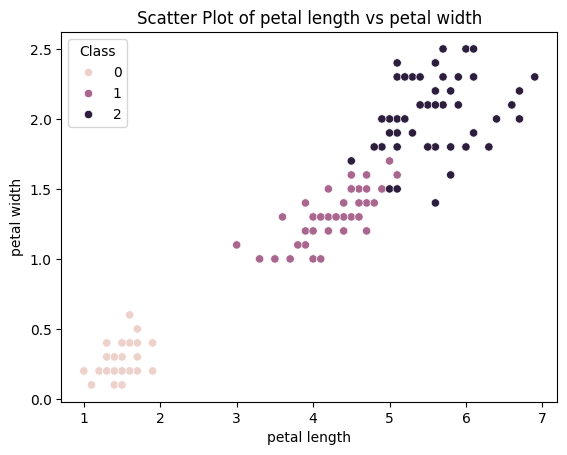

In [22]:
sns.scatterplot(x='petal length', y='petal width', hue='class', data=data)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Scatter Plot of petal length vs petal width')
plt.legend(title='Class')
plt.show()

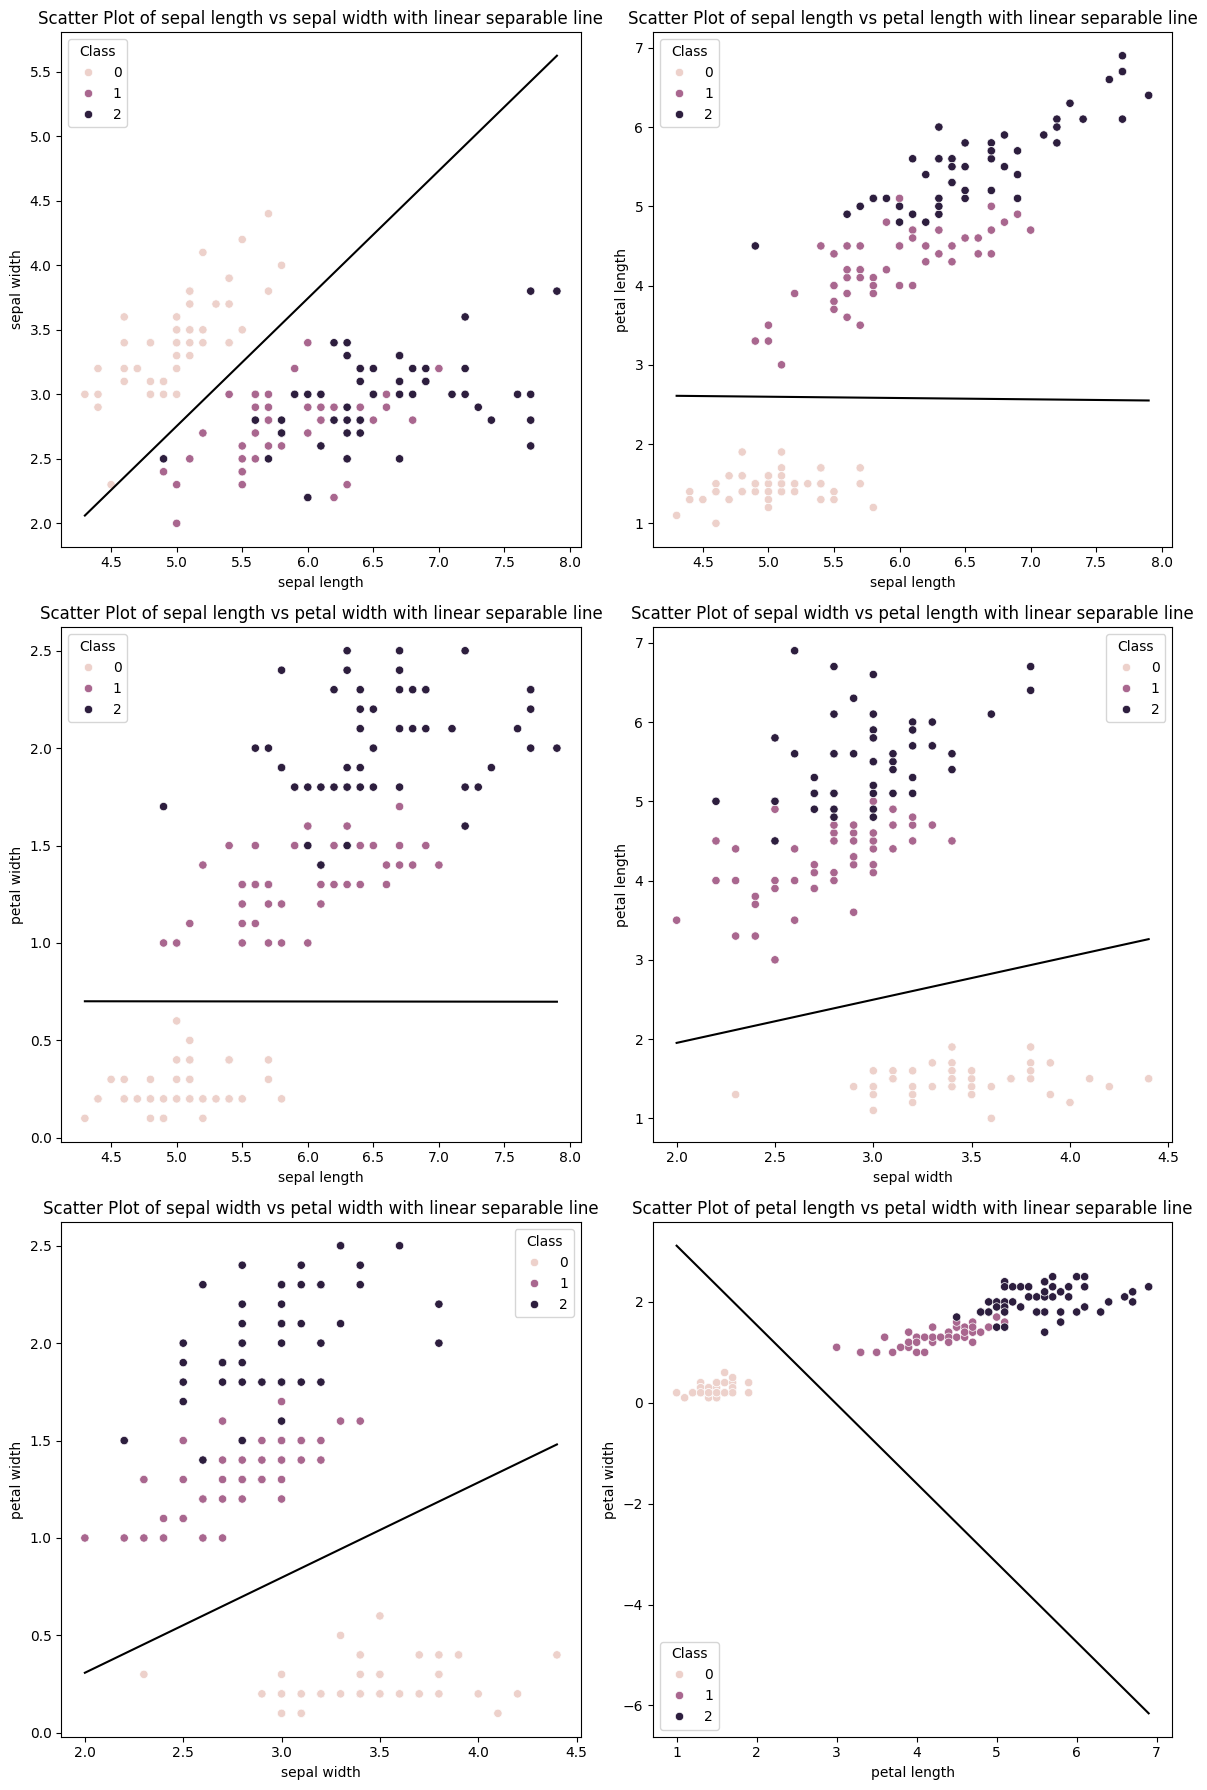

In [23]:


features = ['sepal length', 'sepal width', 'petal length', 'petal width']

fig, axis = plt.subplots(3, 2, figsize=(12, 18))  # 3 rows , 2 columns
axes = axis.flatten()

for idx, (feature1, feature2) in enumerate([(features[i], features[j]) for i in range(len(features)) for j in range(i+1, len(features))]):
    model = SVC(kernel='linear')
    X = data[[feature1, feature2]]
    y = data['class']
    model.fit(X, y)
    sns.scatterplot(x=feature1, y=feature2, hue='class', data=data, ax=axes[idx])


    w = model.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min(X[feature1]), max(X[feature1]))
    yy = a * xx - (model.intercept_[0]) / w[1]

    axes[idx].plot(xx, yy, 'k-')

    axes[idx].set_xlabel(feature1)
    axes[idx].set_ylabel(feature2)
    axes[idx].set_title(f'Scatter Plot of {feature1} vs {feature2} with linear separable line')
    axes[idx].legend(title='Class')

plt.tight_layout()
plt.show()


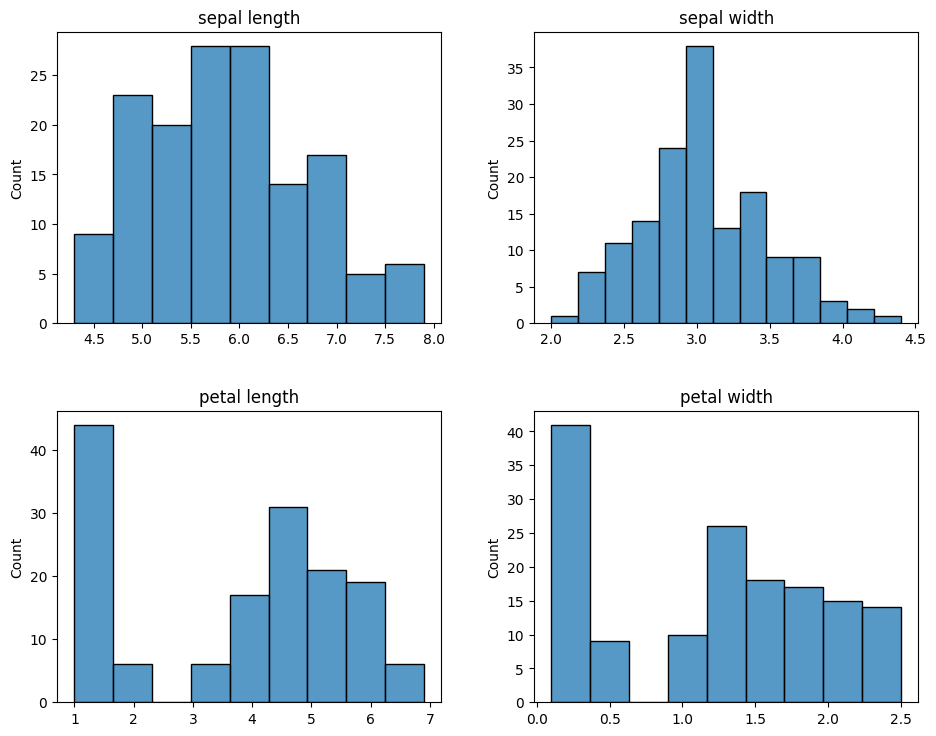

In [45]:
vars = ['sepal length', 'sepal width', 'petal length', 'petal width']
plt.figure(figsize=(10, 8))

for i, var in enumerate(vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var])
    plt.title(var)
    plt.xlabel('')

plt.tight_layout(pad=3.0)
plt.show()


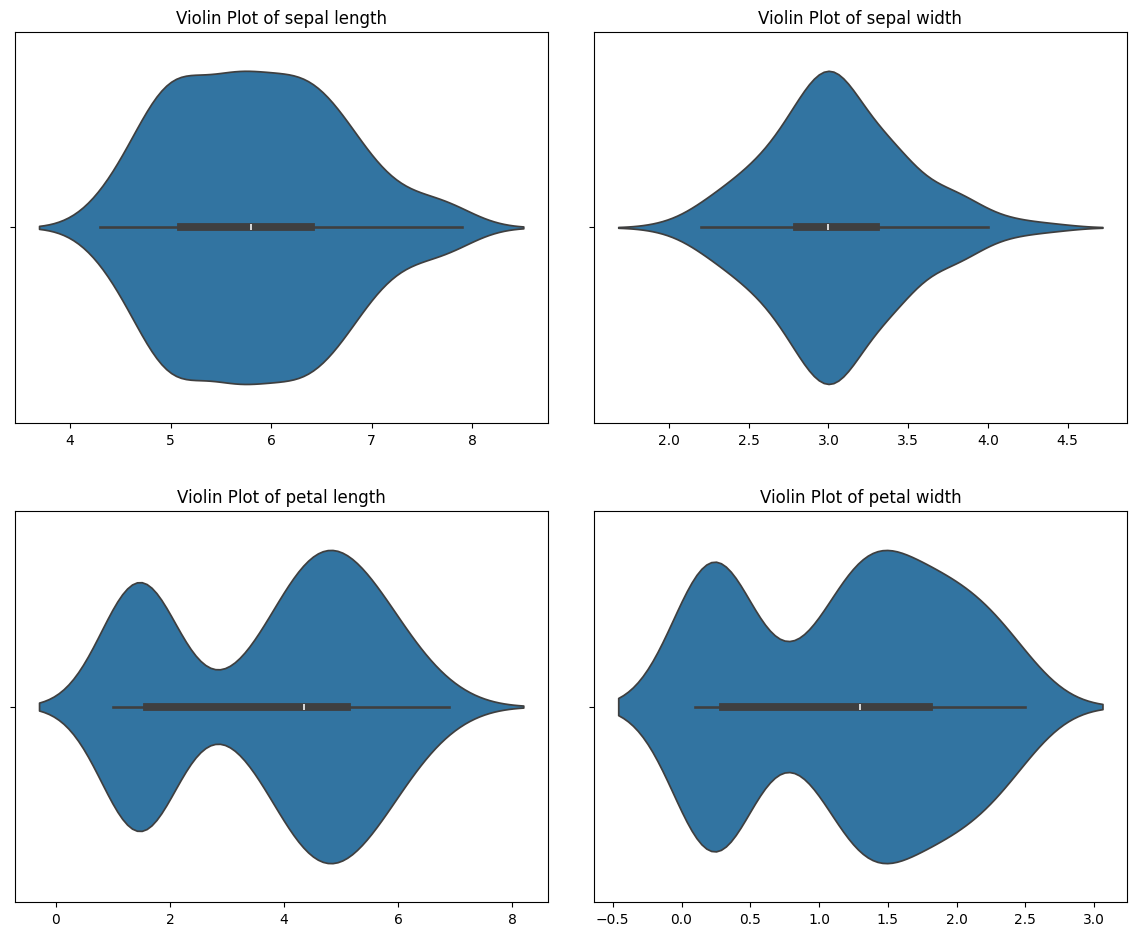

In [46]:
plt.figure(figsize=(12, 10))  # Adjust the figsize based on your preference

for i, var in enumerate(vars, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=data[var])
    plt.title(f'Violin Plot of {var}')
    plt.xlabel('')

plt.tight_layout(pad=3.0)
plt.show()

<ipython-input-50-ed035b5e032b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[var1], y=data[var2], palette=colors)
<ipython-input-50-ed035b5e032b>:18: UserWarning: 
The palette list has fewer values (4) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x=data[var1], y=data[var2], palette=colors)
<ipython-input-50-ed035b5e032b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[var1], y=data[var2], palette=colors)
<ipython-input-50-ed035b5e032b>:18: UserWarning: 
The palette list has fewer values (4) than needed (35) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(x=data[var1], y=data[var2], palett

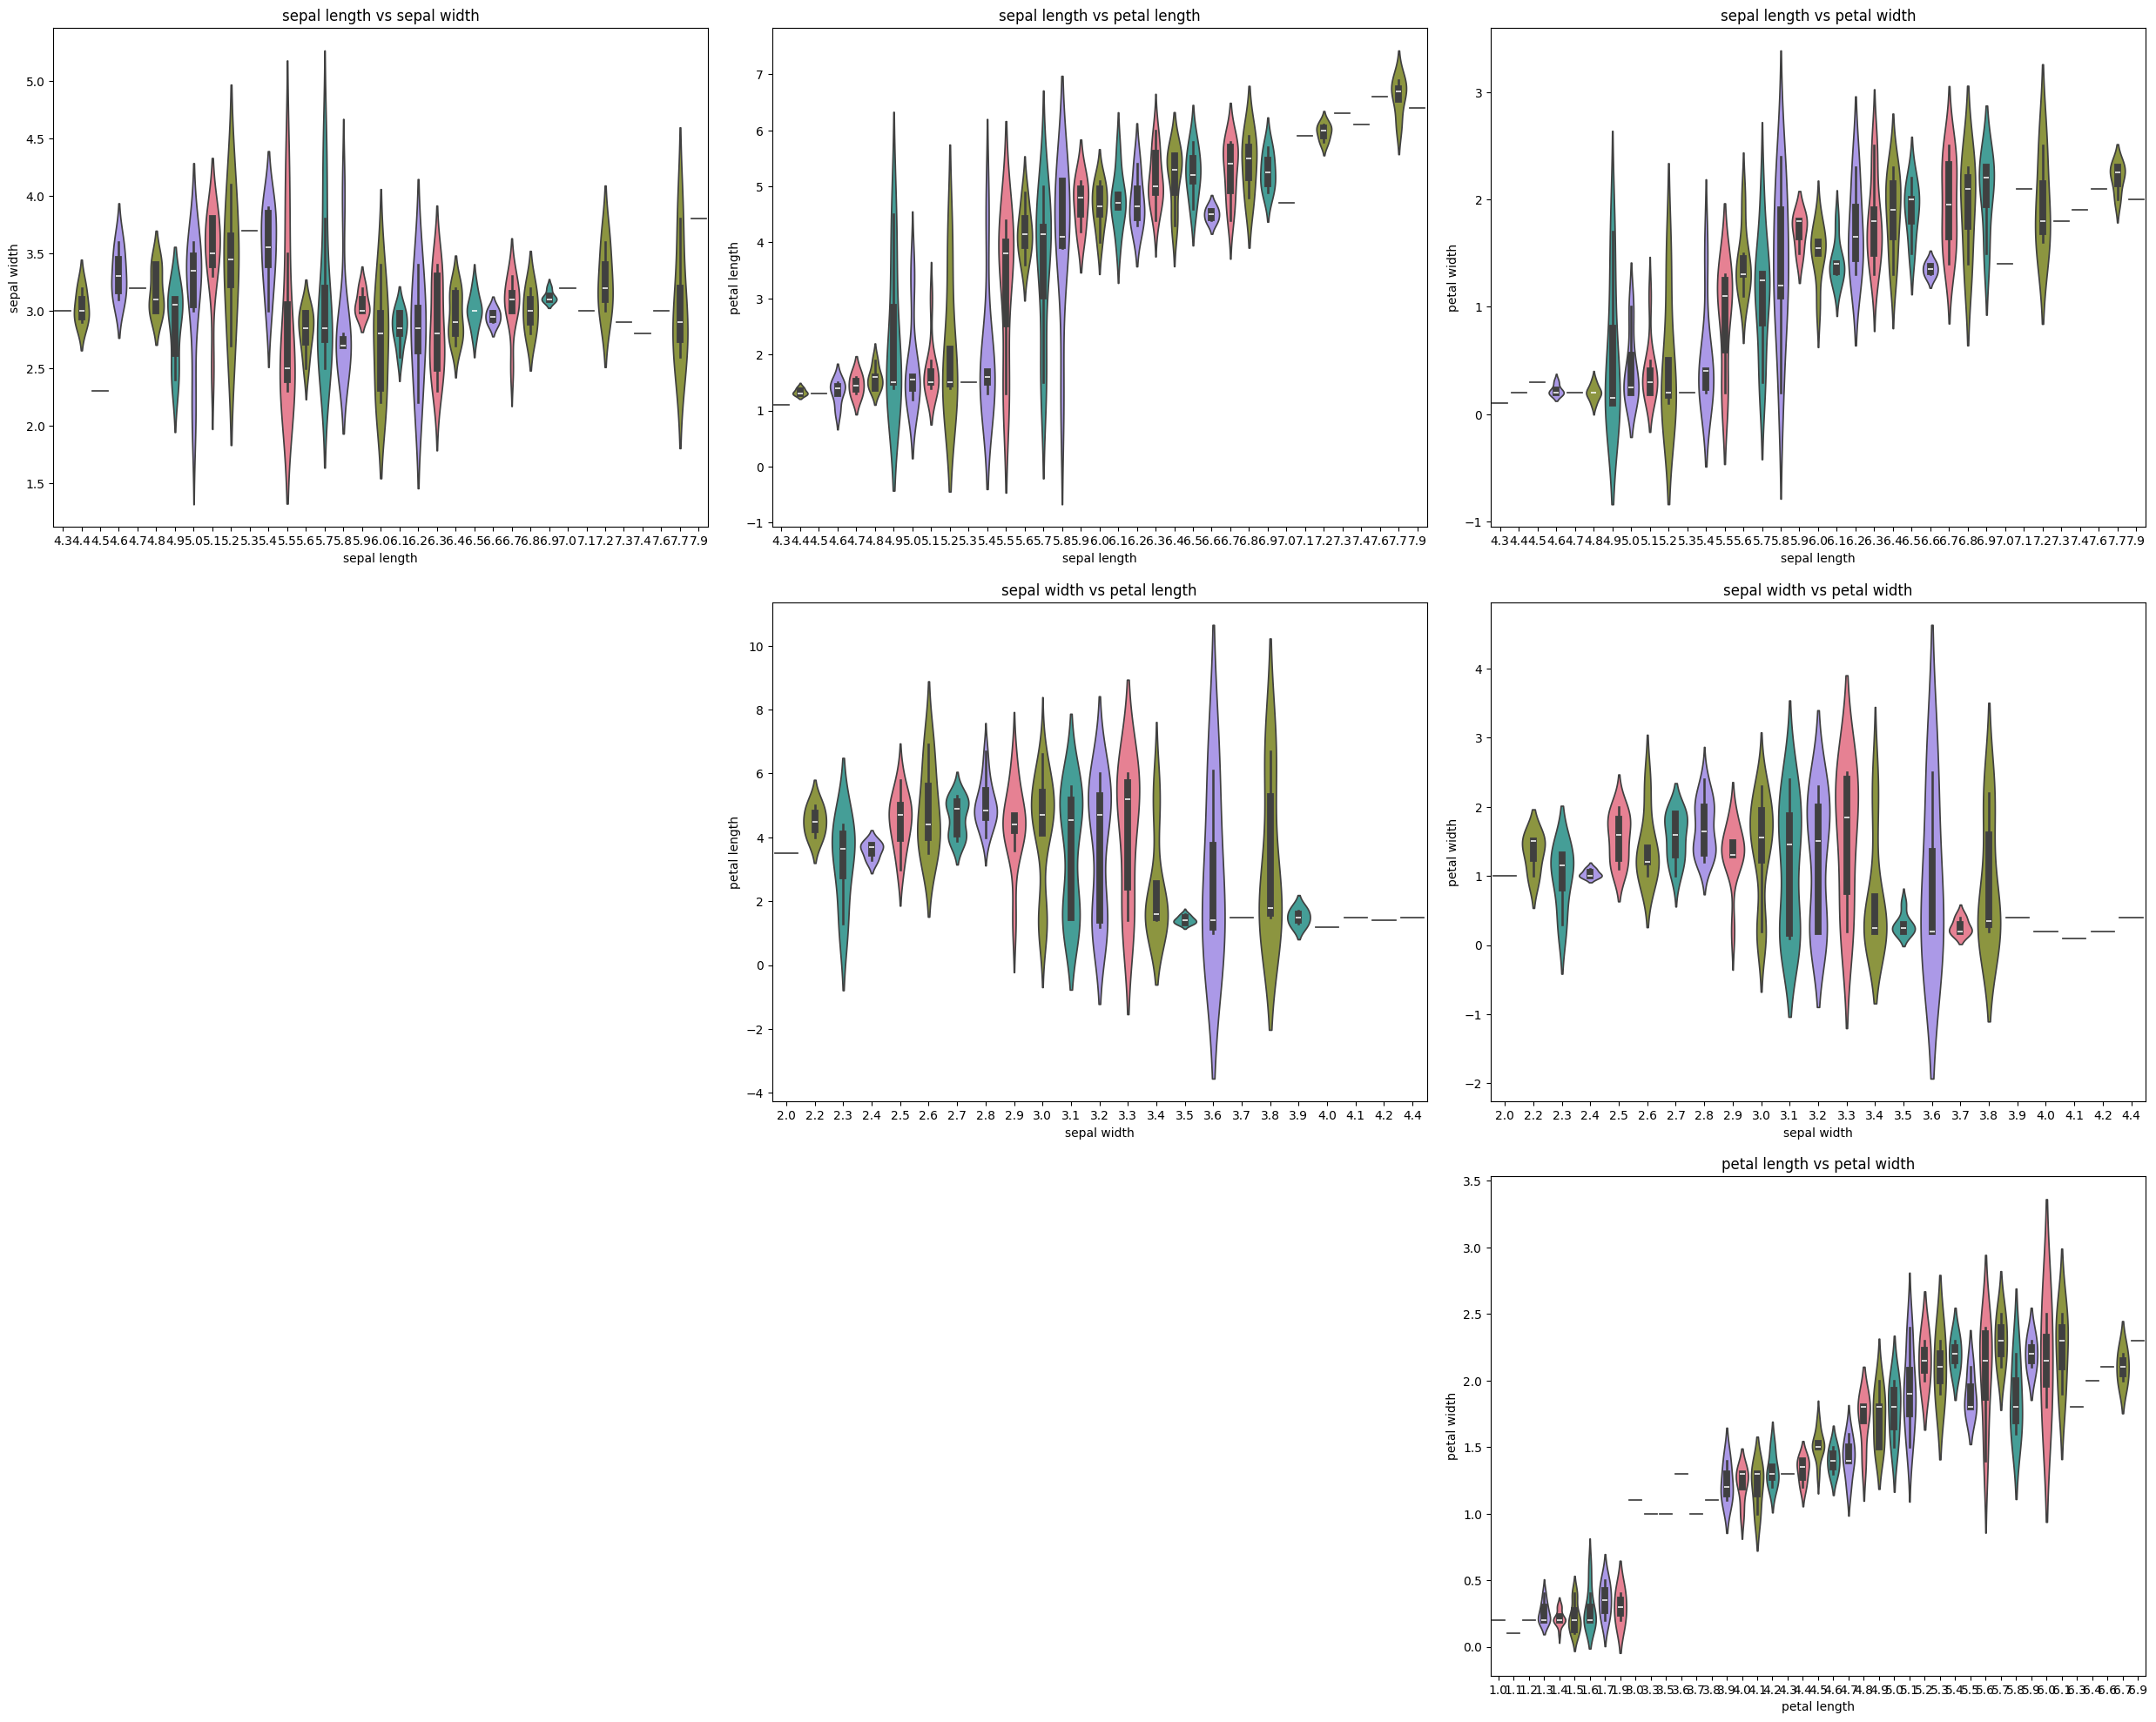

In [50]:

colors = sns.color_palette('husl', n_colors=len(vars))

# Set the figure size
plt.figure(figsize=(25, 20))

# Create violin plots for each pair of features
for i, var1 in enumerate(vars):
    for j, var2 in enumerate(vars):
        if i < j:
            plt.subplot(3, 3, (i * 3) + j)
            sns.violinplot(x=data[var1], y=data[var2], palette=colors)
            plt.title(f'{var1} vs {var2}')
            plt.xlabel(var1)
            plt.ylabel(var2)

plt.tight_layout(pad=1.5)
plt.show()


## Part 2

In [27]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

<Axes: >

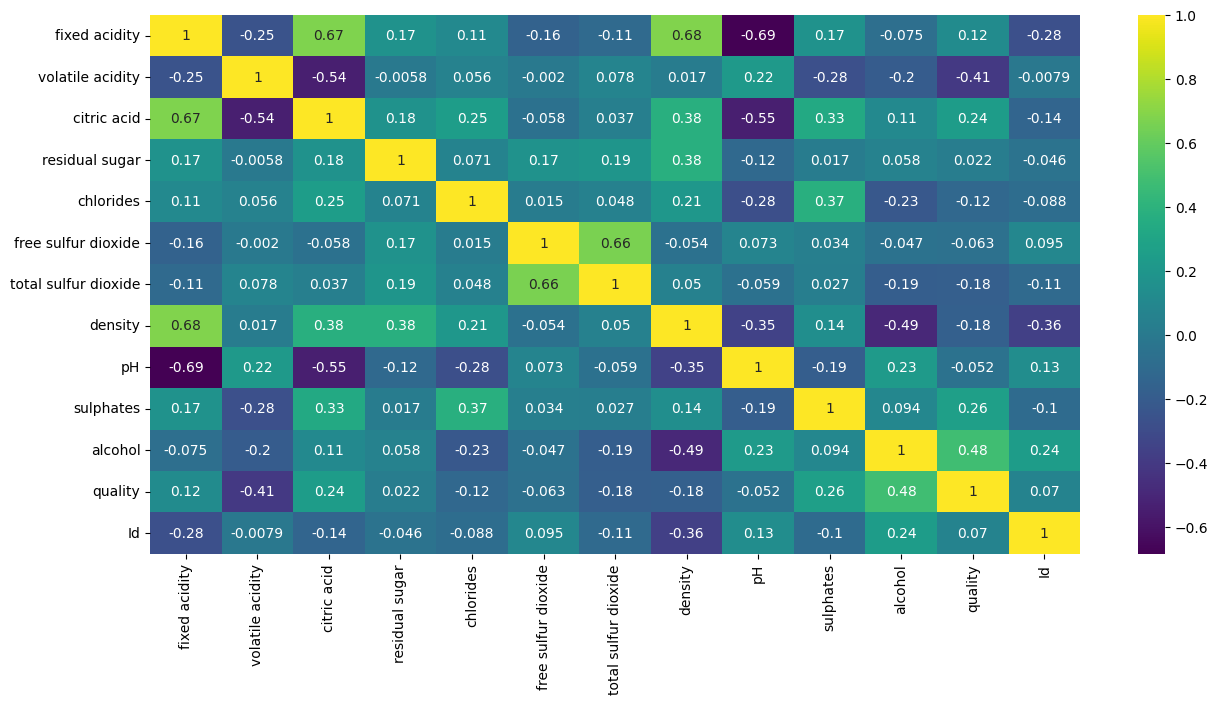

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),cmap='viridis', annot=True)

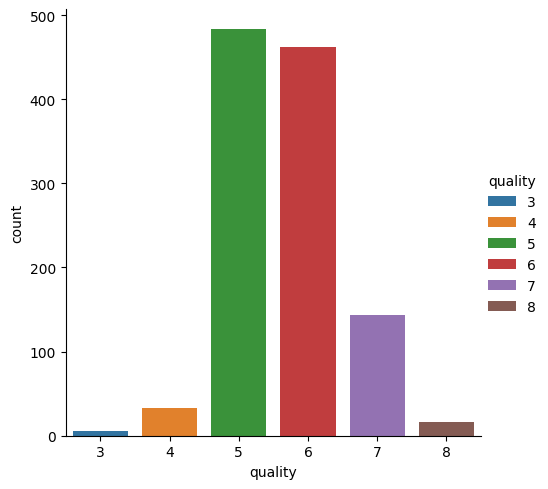

In [30]:
sns.catplot(x = 'quality', data = df, hue = 'quality', kind = 'count',palette = 'tab10')

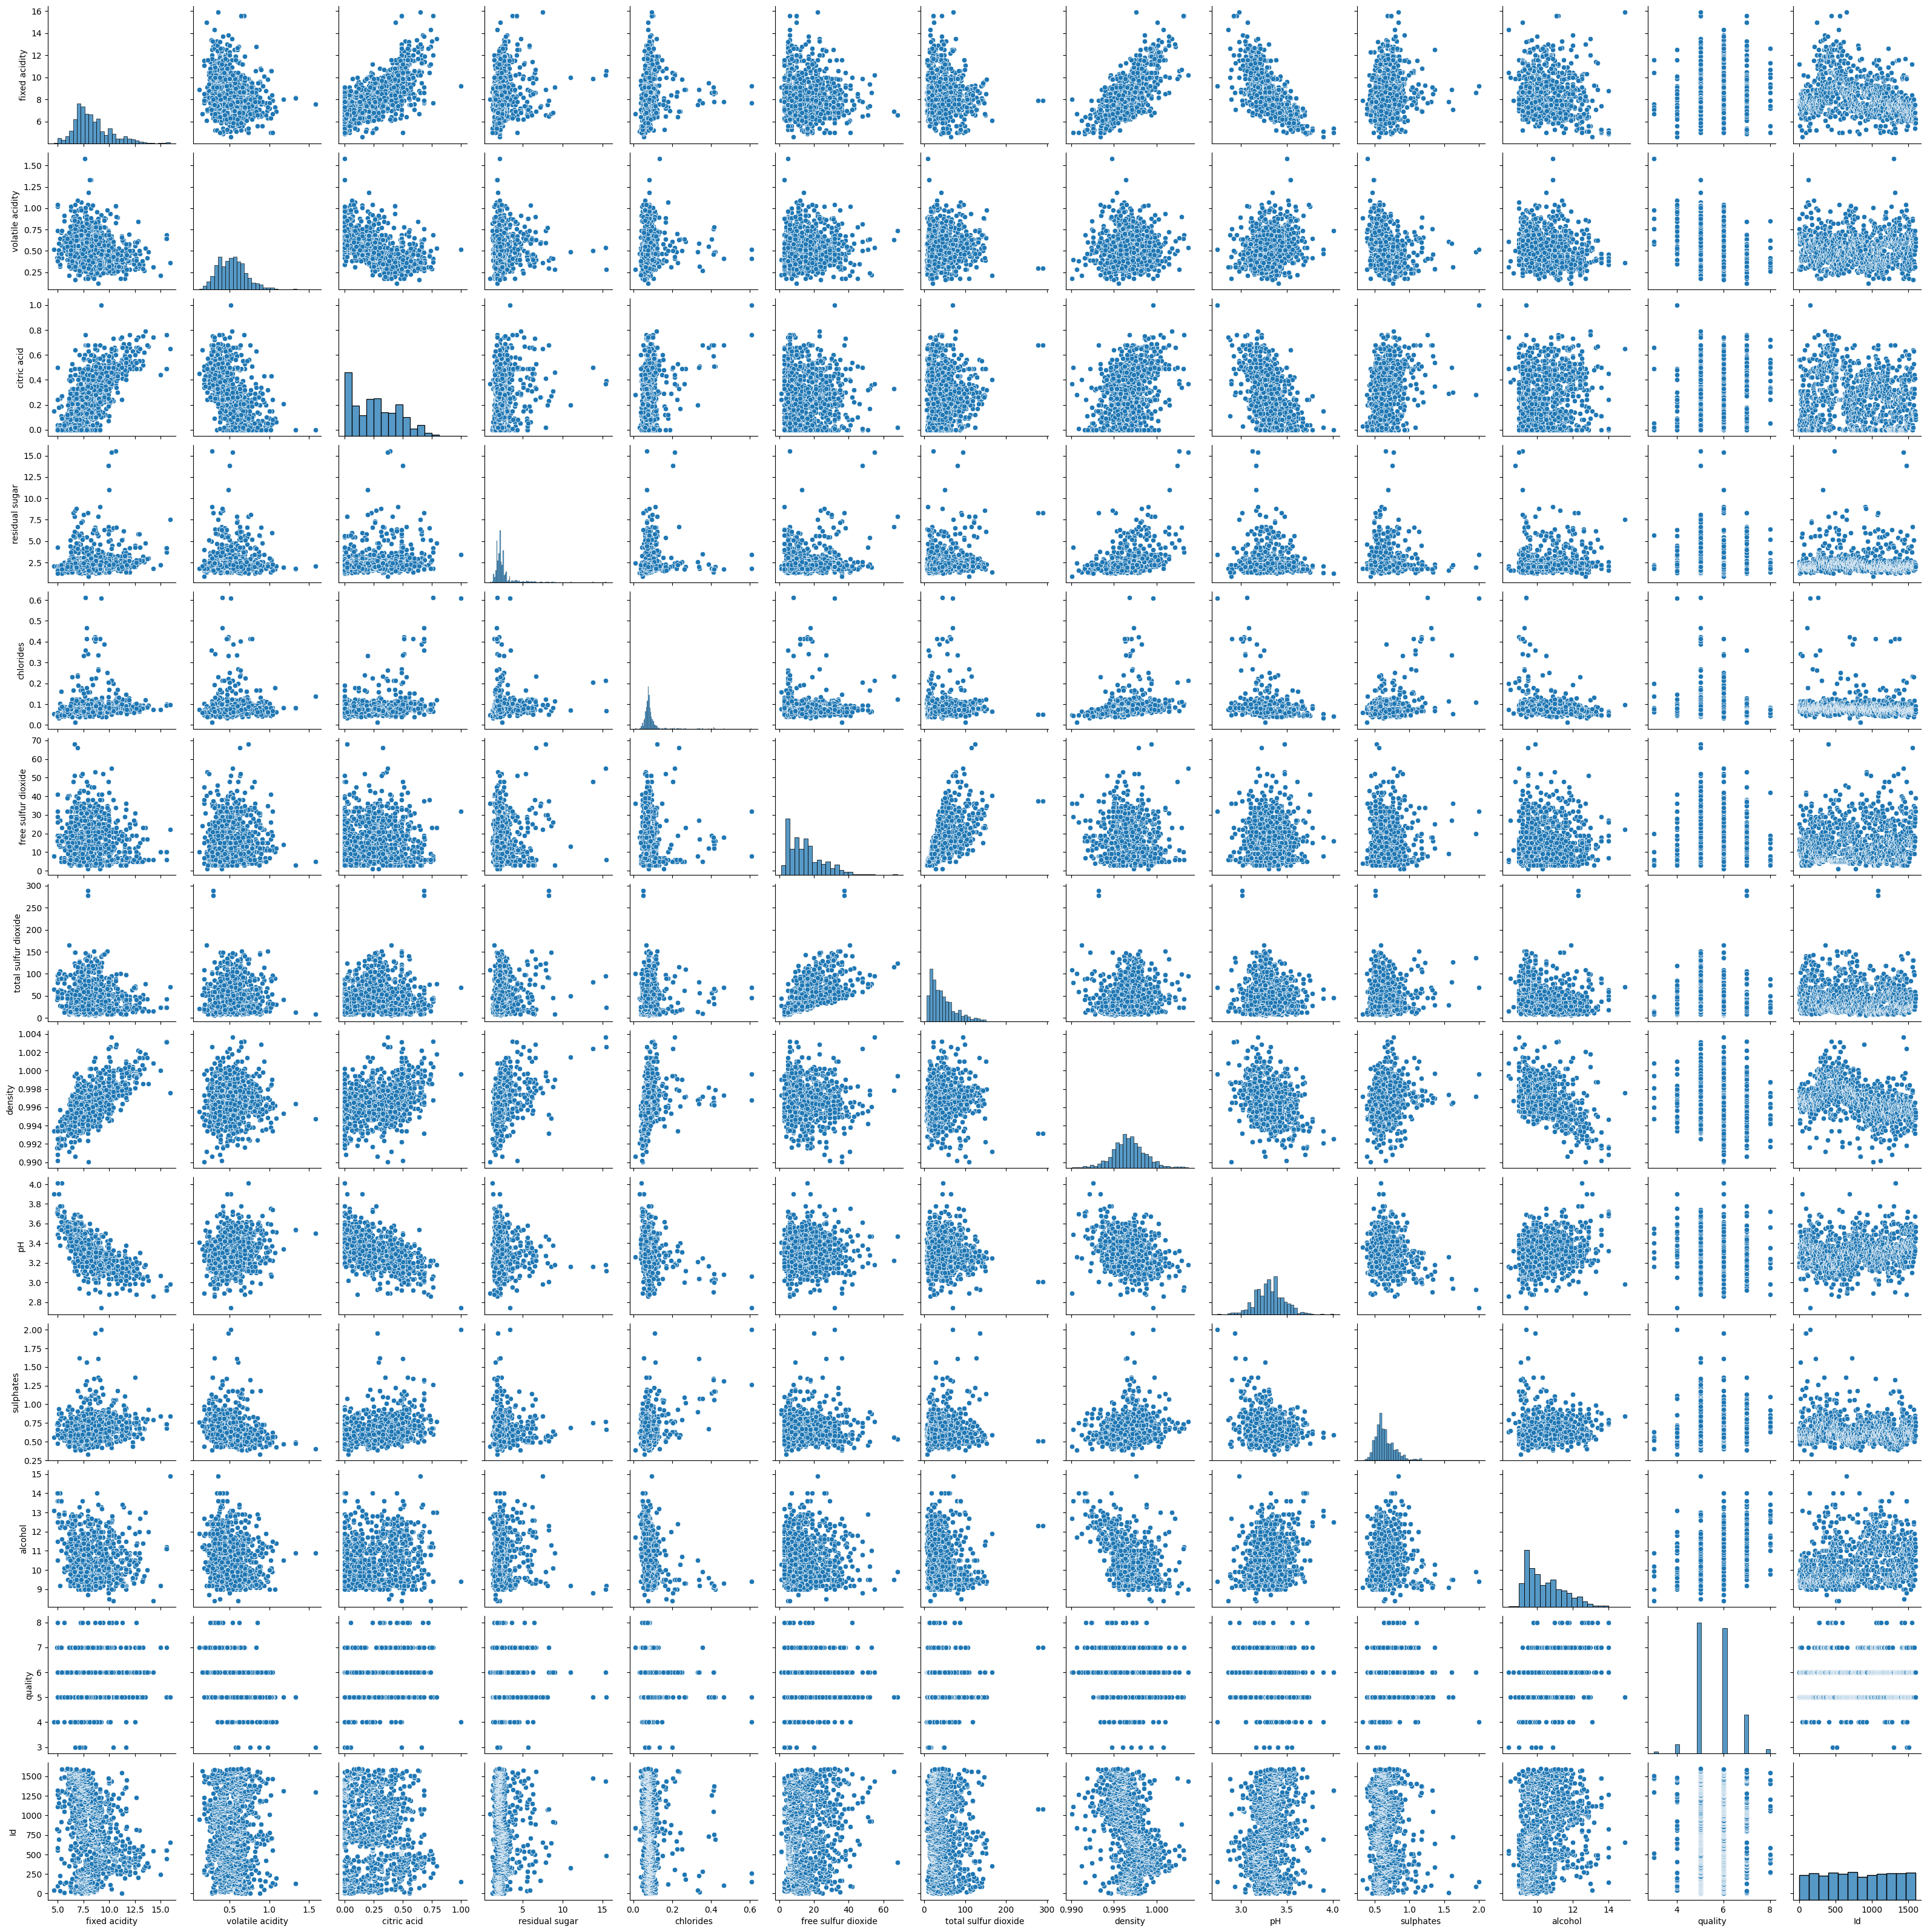

In [31]:
sns.pairplot(df)

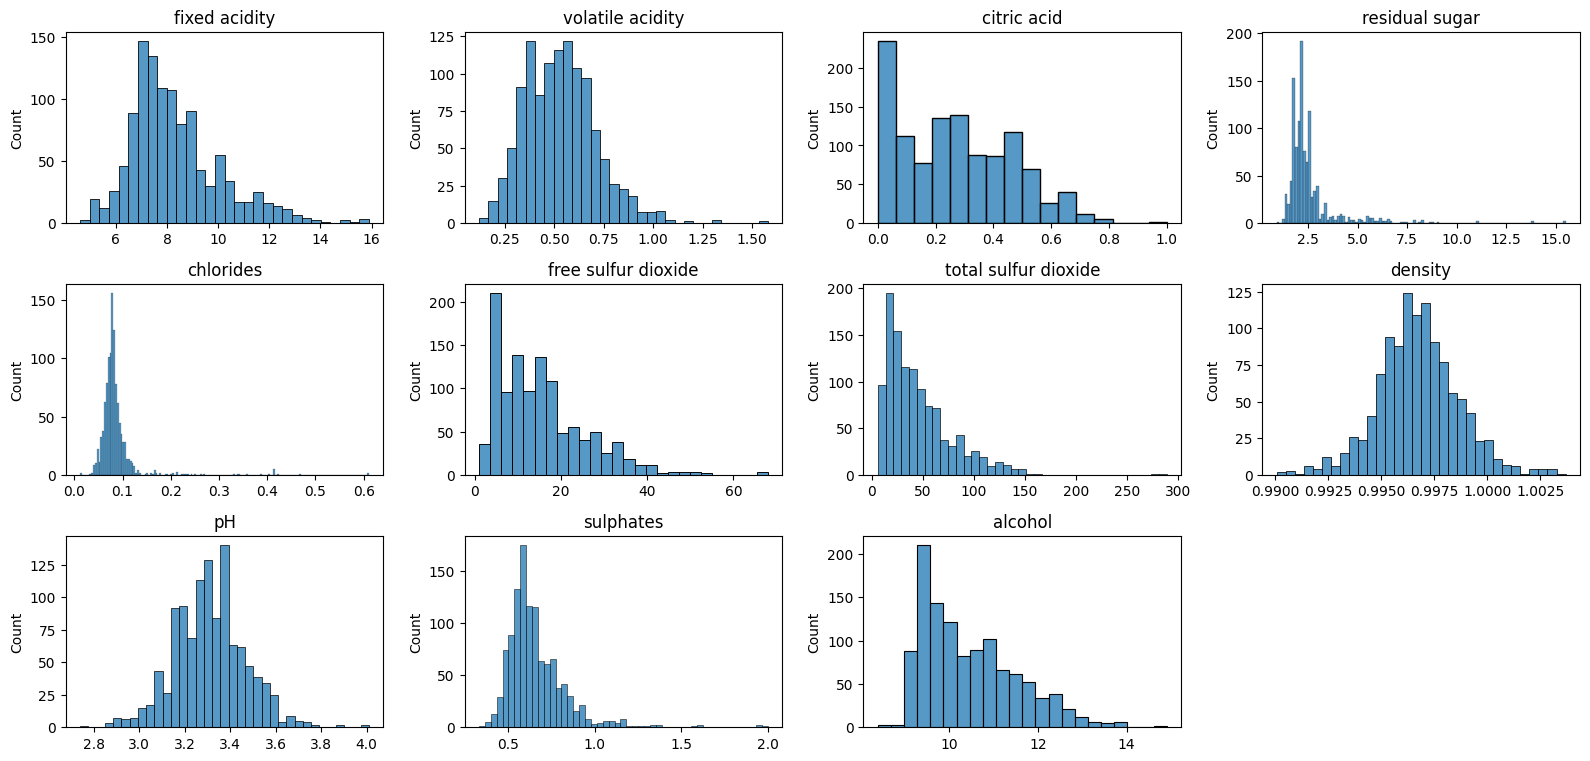

In [32]:
numeric_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


plt.figure(figsize=(16,10 ))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[var])
    plt.title(var)
    plt.xlabel('')
plt.tight_layout()
plt.show()


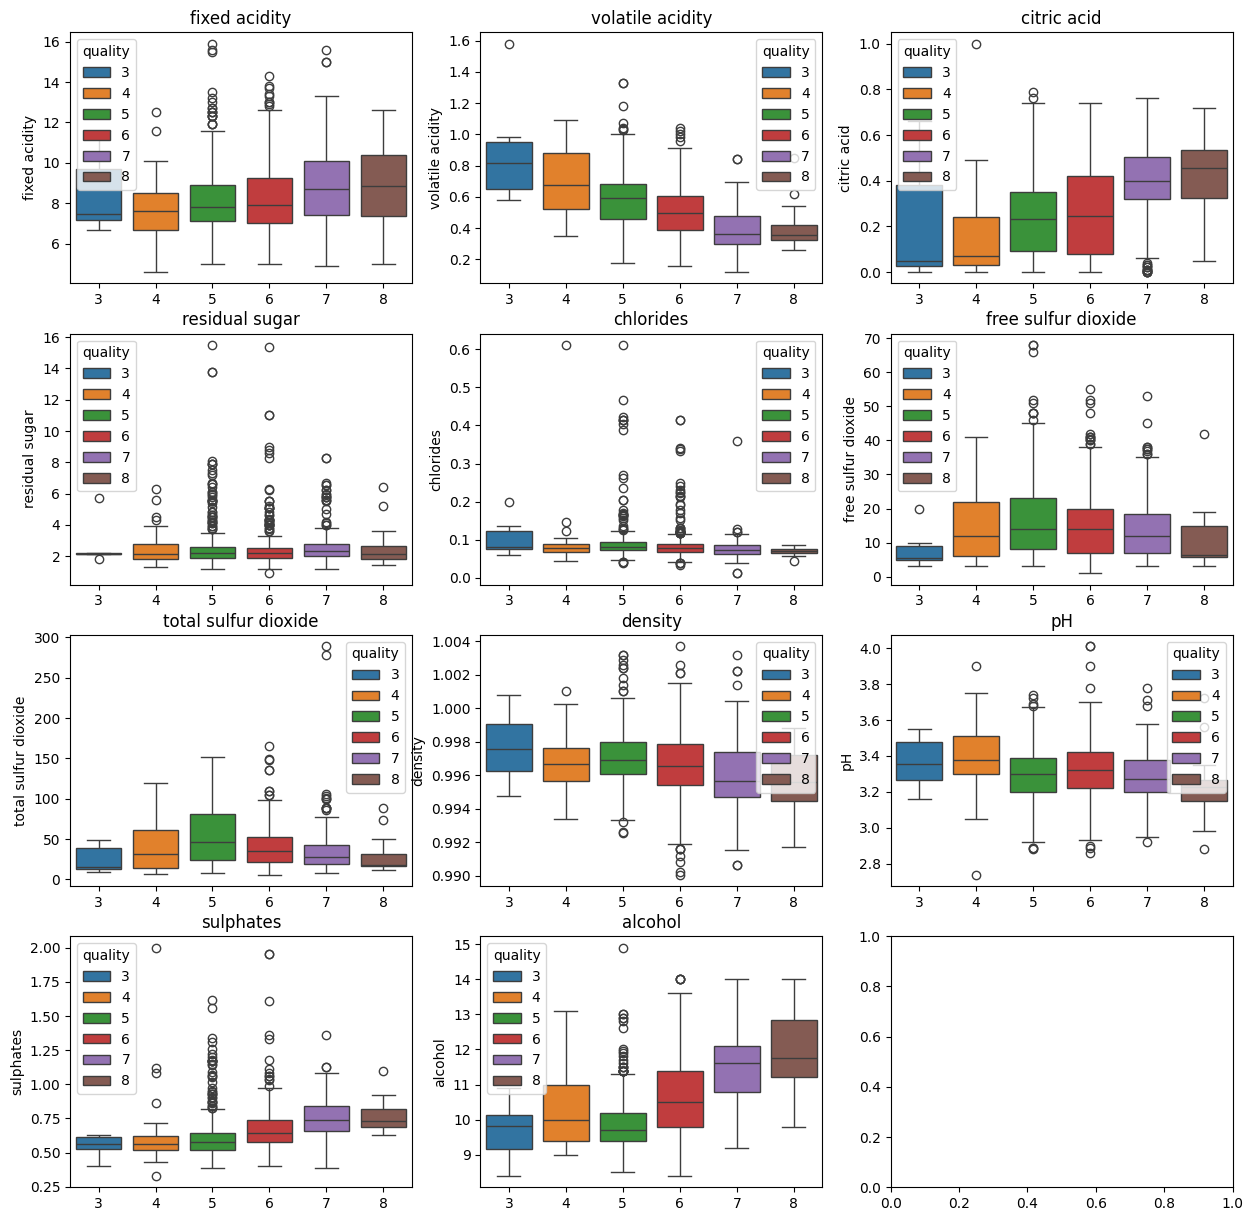

<Figure size 1400x1800 with 0 Axes>

In [34]:


numeric_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

colors = sns.color_palette("husl", len(numeric_vars))
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

row = 0
column = 0
plt.figure(figsize=(14,18))
for i, var in enumerate(numeric_vars, 1):
    sns.boxplot(data=df, x='quality', y=var, hue='quality', palette='tab10', ax=ax[row, column])
    ax[row, column].set_title(var)
    ax[row, column].set_xlabel('')

    column += 1
    if (column) % 3 == 0:
        column = 0
        row += 1

plt.tight_layout()
plt.show()


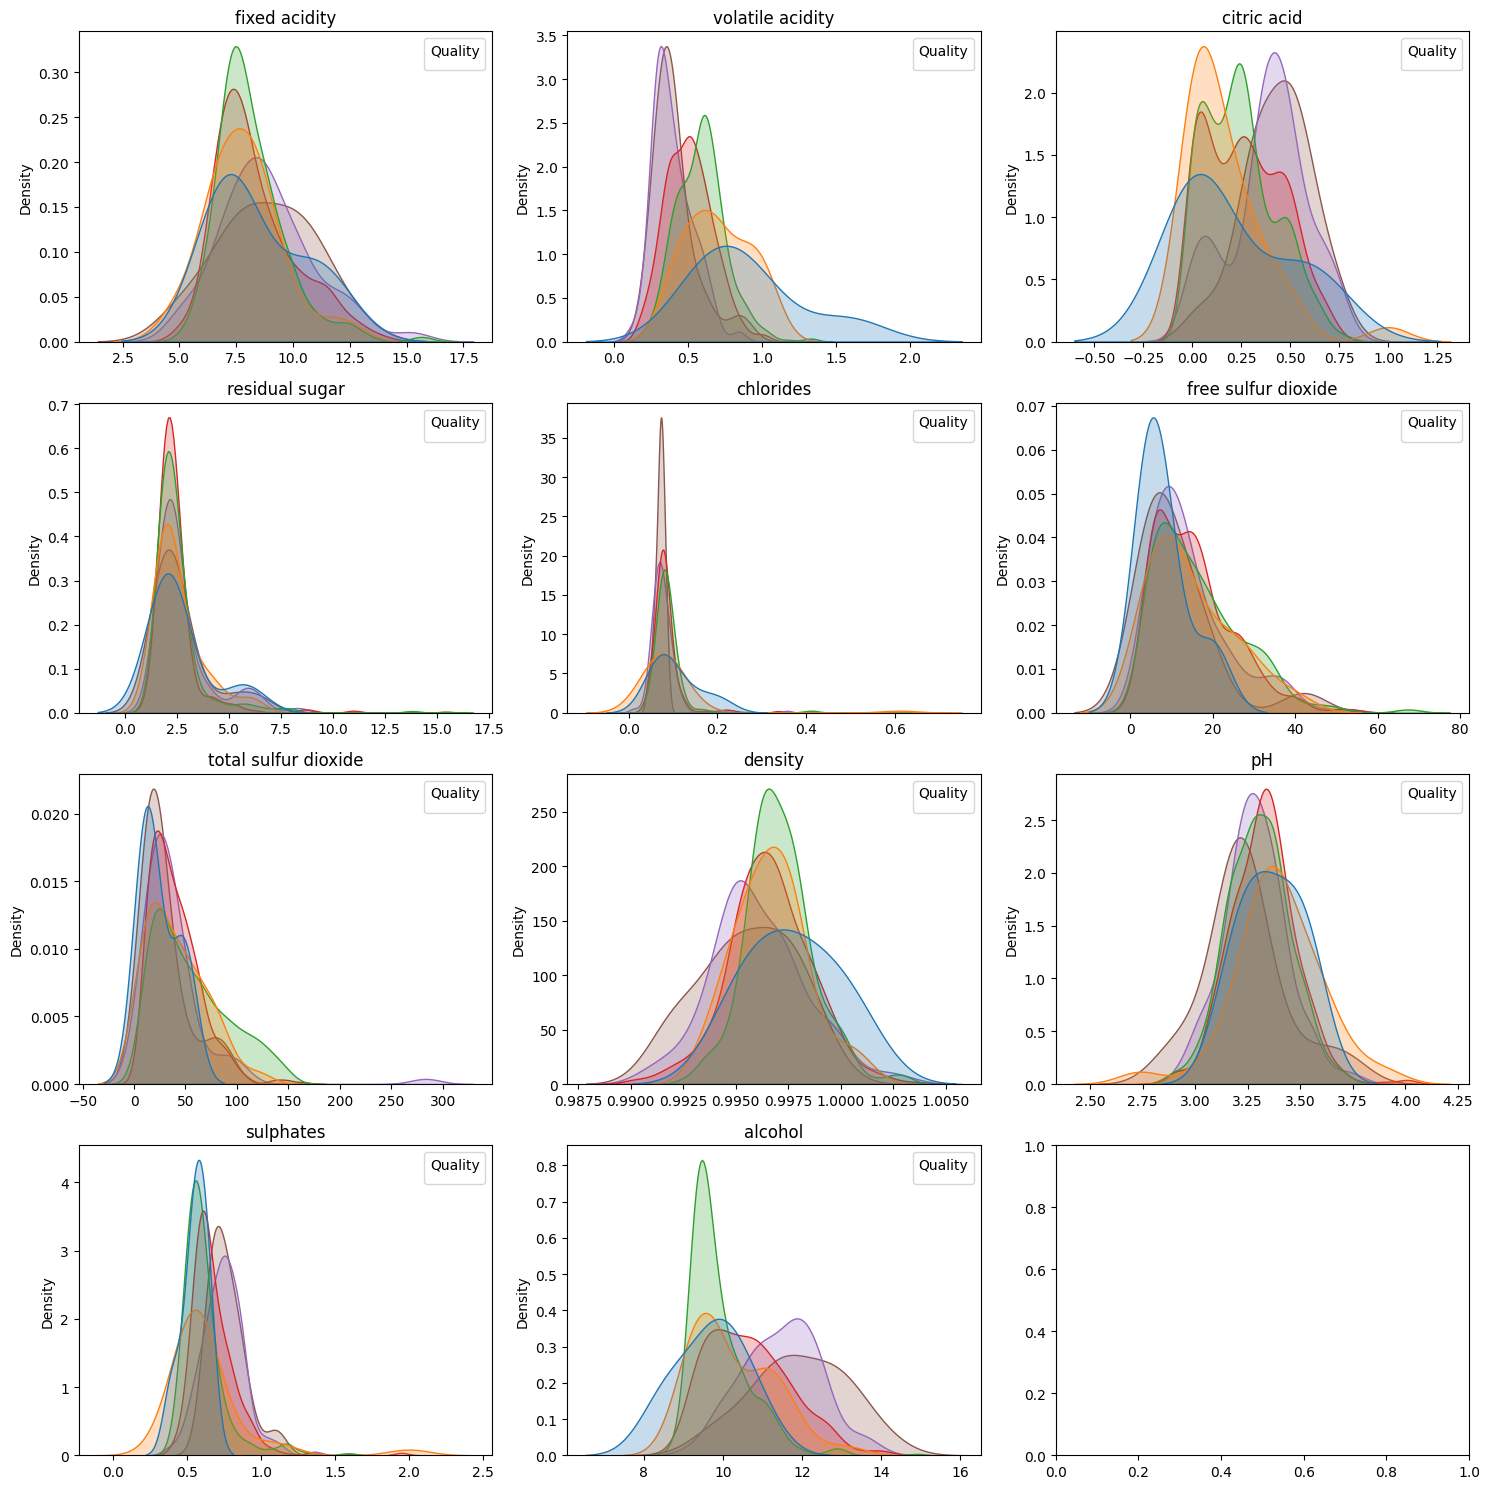

In [51]:

numeric_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']

# Set the color palette
colors = sns.color_palette("husl", len(numeric_vars))

# Set up subplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Loop through numeric variables
row = 0
column = 0
for i, var in enumerate(numeric_vars, 1):
    sns.kdeplot(data=df, x=var, hue='quality', fill=True, common_norm=False, palette='tab10', ax=ax[row, column])
    ax[row, column].set_title(var)
    ax[row, column].set_xlabel('')
    ax[row, column].legend(title='Quality')

    column += 1
    if (column) % 3 == 0:
        column = 0
        row += 1

plt.tight_layout()
plt.show()


In [35]:
numeric_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
colors = sns.color_palette("husl", len(numeric_vars))
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

row = 0
column = 0

for i, (var, color) in enumerate(zip(numeric_vars, colors), 1):
    sns.violinplot(data=df, x='quality', y=var, hue='quality', palette='tab10', ax=ax[row, column])
    ax[row, column].set_title(var)
    ax[row, column].set_xlabel('')
    column += 1
    if (column) % 3 == 0:
        column = 0
        row += 1

fig.tight_layout()
plt.show()
